In [309]:
import requests
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

In [310]:
file_name = "../../data/dpc-covid19-ita-regioni.json"

In [311]:
df = pd.read_json(file_name)
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2020-06-10T17:00:00,ITA,9,Toscana,43.769231,11.255889,40,15,55,484,539,-89,3,8531,1078,10148,280491,198466.0,,
2264,2020-06-10T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,6,1,7,73,80,-1,0,3895,464,4439,97739,52412.0,,
2265,2020-06-10T17:00:00,ITA,10,Umbria,43.106758,12.388247,13,2,15,13,28,-1,1,1332,76,1436,78366,55763.0,,
2266,2020-06-10T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,3,0,3,3,6,-2,0,1041,144,1191,16141,12502.0,,


In [312]:
type(df.data[0]);

In [313]:
date = pd.to_datetime(df.data)

In [314]:
df['date'] = date

In [315]:
print(type(df.data[0]), type(df.date[0]));

<class 'str'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [316]:
df.drop('data',1, inplace=True)

In [317]:
df.columns

Index(['stato', 'codice_regione', 'denominazione_regione', 'lat', 'long',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en', 'date'],
      dtype='object')

In [318]:
df.set_index(['date', 'codice_regione'], inplace=True)

In [319]:
df

stato denominazione_regione        lat  \
date                codice_regione                                          
2020-02-24 18:00:00 13               ITA               Abruzzo  42.351222   
                    17               ITA            Basilicata  40.639471   
                    21               ITA          P.A. Bolzano  46.499335   
                    18               ITA              Calabria  38.905976   
                    15               ITA              Campania  40.839566   
...                                  ...                   ...        ...   
2020-06-10 17:00:00 9                ITA               Toscana  43.769231   
                    22               ITA           P.A. Trento  46.068935   
                    10               ITA                Umbria  43.106758   
                    2                ITA         Valle d'Aosta  45.737503   
                    5                ITA                Veneto  45.434905   

                                         long  ricoverati_con_sintomi  \
date                codice_regione                                      
2020-02-24 18:00:00 13              13.398438                       0   
                    17              15.805148                       0   
                    21              11.356624                       0   
                    18              16.594402                       0   
                    15              14.250850                       0   
...                                       ...                     ...   
2020-06-10 17:00:00 9               11.255889                      40   
                    22              11.121231                       6   
                    10              12.388247                      13   
                    2                7.320149                       3   
                    5               12.338452                      66   

                                    terapia_intensiva  totale_ospedalizzati  \
date                codice_regione                                            
2020-02-24 18:00:00 13                              0                     0   
                    17                              0                     0   
                    21                              0                     0   
                    18                              0                     0   
                    15                              0                     0   
...                                               ...                   ...   
2020-06-10 17:00:00 9                              15                    55   
                    22                              1                     7   
                    10                              2                    15   
                    2                               0                     3   
                    5                               0                    66   

                                    isolamento_domiciliare  totale_positivi  \
date                codice_regione                                            
2020-02-24 18:00:00 13                                   0                0   
                    17                                   0                0   
                    21                                   0                0   
                    18                                   0                0   
                    15                                   0                0   
...                                                    ...              ...   
2020-06-10 17:00:00 9                                  484              539   
                    22                                  73               80   
                    10                                  13               28   
                    2                                    3                6   
                    5                                  899              965   

                           

In [320]:
Bolzano = df.xs(21,level="codice_regione")

In [321]:
Trento = df.xs(22,level="codice_regione")

In [322]:
Bolzano

,stato,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
date,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
2020-02-25 18:00:00,ITA,P.A. Bolzano,46.499335,11.356624,1,0,1,0,1,1,1,0,0,1,1,NaN,,
2020-02-26 18:00:00,ITA,P.A. Bolzano,46.499335,11.356624,1,0,1,0,1,0,0,0,0,1,1,NaN,,
2020-02-27 18:00:00,ITA,P.A. Bolzano,46.499335,11.356624,1,0,1,0,1,0,0,0,0,1,2,NaN,,
2020-02-28 18:00:00,ITA,P.A. Bolzano,46.499335,11.356624,1,0,1,0,1,0,0,0,0,1,2,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 17:00:00,ITA,P.A. Bolzano,46.499335,11.356624,7,2,9,91,100,-1,1,2208,292,2600,70578,33291.0,,
2020-06-07 17:00:00,ITA,P.A. Bolzano,46.499335,11.356624,7,2,9,88,97,-3,3,2214,292,2603,71755,33944.0,,
2020-06-08 17:00:00,ITA,P.A. Bolzano,46.499335,11.356624,7,2,9,88,97,0,1,2215,292,2604,72257,34307.0,,


In [323]:
Trento

,stato,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
date,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,0,3,NaN,,
2020-02-25 18:00:00,ITA,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,0,3,NaN,,
2020-02-26 18:00:00,ITA,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,0,3,NaN,,
2020-02-27 18:00:00,ITA,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,0,32,NaN,,
2020-02-28 18:00:00,ITA,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,0,32,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 17:00:00,ITA,P.A. Trento,46.068935,11.121231,6,1,7,97,104,-19,1,3866,464,4434,94159,50758.0,,
2020-06-07 17:00:00,ITA,P.A. Trento,46.068935,11.121231,6,1,7,75,82,-22,1,3889,464,4435,95638,51385.0,,
2020-06-08 17:00:00,ITA,P.A. Trento,46.068935,11.121231,7,1,8,73,81,-1,1,3891,464,4436,95825,51453.0,,


In [324]:
Trentino_Alto_Adige = Bolzano+Trento
print(Bolzano.shape,Trento.shape,Trentino_Alto_Adige.shape)
Trentino_Alto_Adige.stato = "ITA"
Trentino_Alto_Adige.denominazione_regione = "Trentino Alto-Adige"
Trentino_Alto_Adige.lat/=2.0
Trentino_Alto_Adige.long/=2.0
Trentino_Alto_Adige['codice_regione'] = 4
Trentino_Alto_Adige.set_index('codice_regione',append=True,inplace=True)
Trentino_Alto_Adige
#  denominazione_regione lat long 

(108, 18) (108, 18) (108, 18)


,,stato,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
date,codice_regione,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,0,0,0,0,0,0,0,0,0,0,4,NaN,,
2020-02-25 18:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,1,0,1,0,1,1,1,0,0,1,4,NaN,,
2020-02-26 18:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,1,0,1,0,1,0,0,0,0,1,4,NaN,,
2020-02-27 18:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,1,0,1,0,1,0,0,0,0,1,34,NaN,,
2020-02-28 18:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,1,0,1,0,1,0,0,0,0,1,34,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 17:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,13,3,16,188,204,-20,2,6074,756,7034,164737,84049.0,,
2020-06-07 17:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,13,3,16,163,179,-25,4,6103,756,7038,167393,85329.0,,
2020-06-08 17:00:00,4,ITA,Trentino Alto-Adige,46.284135,11.238928,14,3,17,161,178,-1,2,6106,756,7040,168082,85760.0,,


In [325]:
df.drop([21,22], axis=0, level="codice_regione",inplace=True)

In [326]:
df = pd.concat([df,Trentino_Alto_Adige])

In [327]:
df

stato denominazione_regione        lat  \
date                codice_regione                                          
2020-02-24 18:00:00 13               ITA               Abruzzo  42.351222   
                    17               ITA            Basilicata  40.639471   
                    18               ITA              Calabria  38.905976   
                    15               ITA              Campania  40.839566   
                    8                ITA        Emilia-Romagna  44.494367   
...                                  ...                   ...        ...   
2020-06-06 17:00:00 4                ITA   Trentino Alto-Adige  46.284135   
2020-06-07 17:00:00 4                ITA   Trentino Alto-Adige  46.284135   
2020-06-08 17:00:00 4                ITA   Trentino Alto-Adige  46.284135   
2020-06-09 17:00:00 4                ITA   Trentino Alto-Adige  46.284135   
2020-06-10 17:00:00 4                ITA   Trentino Alto-Adige  46.284135   

                                         long  ricoverati_con_sintomi  \
date                codice_regione                                      
2020-02-24 18:00:00 13              13.398438                       0   
                    17              15.805148                       0   
                    18              16.594402                       0   
                    15              14.250850                       0   
                    8               11.341721                      10   
...                                       ...                     ...   
2020-06-06 17:00:00 4               11.238928                      13   
2020-06-07 17:00:00 4               11.238928                      13   
2020-06-08 17:00:00 4               11.238928                      14   
2020-06-09 17:00:00 4               11.238928                      13   
2020-06-10 17:00:00 4               11.238928                      13   

                                    terapia_intensiva  totale_ospedalizzati  \
date                codice_regione                                            
2020-02-24 18:00:00 13                              0                     0   
                    17                              0                     0   
                    18                              0                     0   
                    15                              0                     0   
                    8                               2                    12   
...                                               ...                   ...   
2020-06-06 17:00:00 4                               3                    16   
2020-06-07 17:00:00 4                               3                    16   
2020-06-08 17:00:00 4                               3                    17   
2020-06-09 17:00:00 4                               3                    16   
2020-06-10 17:00:00 4                               3                    16   

                                    isolamento_domiciliare  totale_positivi  \
date                codice_regione                                            
2020-02-24 18:00:00 13                                   0                0   
                    17                                   0                0   
                    18                                   0                0   
                    15                                   0                0   
                    8                                    6               18   
...                                                    ...              ...   
2020-06-06 17:00:00 4                                  188              204   
2020-06-07 17:00:00 4                                  163              179   
2020-06-08 17:00:00 4                                  161              178   
2020-06-09 17:00:00 4                                  160              176   
2020-06-10 17:00:00 4                                  158              174   

                           

In [328]:
df.head(5)

stato denominazione_regione        lat  \
date                codice_regione                                          
2020-02-24 18:00:00 13               ITA               Abruzzo  42.351222   
                    17               ITA            Basilicata  40.639471   
                    18               ITA              Calabria  38.905976   
                    15               ITA              Campania  40.839566   
                    8                ITA        Emilia-Romagna  44.494367   

                                         long  ricoverati_con_sintomi  \
date                codice_regione                                      
2020-02-24 18:00:00 13              13.398438                       0   
                    17              15.805148                       0   
                    18              16.594402                       0   
                    15              14.250850                       0   
                    8               11.341721                      10   

                                    terapia_intensiva  totale_ospedalizzati  \
date                codice_regione                                            
2020-02-24 18:00:00 13                              0                     0   
                    17                              0                     0   
                    18                              0                     0   
                    15                              0                     0   
                    8                               2                    12   

                                    isolamento_domiciliare  totale_positivi  \
date                codice_regione                                            
2020-02-24 18:00:00 13                                   0                0   
                    17                                   0                0   
                    18                                   0                0   
                    15                                   0                0   
                    8                                    6               18   

                                    variazione_totale_positivi  \
date                codice_regione                               
2020-02-24 18:00:00 13                                       0   
                    17                                       0   
                    18                                       0   
                    15                                       0   
                    8                                        0   

                                    nuovi_positivi  dimessi_guariti  deceduti  \
date                codice_regione                                              
2020-02-24 18:00:00 13                           0                0         0   
                    17                           0                0         0   
                    18                           0                0         0   
                    15                           0                0         0   
                    8                           18                0         0   

                                    totale_casi  tamponi  casi_testati  \
date                codice_regione                                       
2020-02-24 18:00:00 13                        0        5           NaN   
                    17                        0        0           NaN   
                    18                        0        1           NaN   
                    15                        0       10           NaN   
                    8                        18      148           NaN   

                                   note_it note_en  
date                codice_regione                  
2020-02-24 18:00:00 13                              
                    17                              
                    18                              
                    15                              
       

In [329]:
# df_abruzzo = df.xs(13,level="codice_regione")
# df_abruzzo.shape
# df_abruzzo.head(10)

In [330]:
y = "totale_casi"
list_labels = []

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


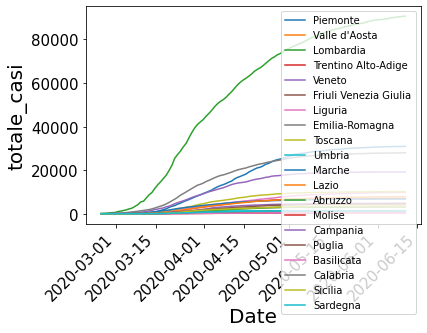

In [331]:
for region_id in range(1,21):
    print (region_id)
    region_name = df.xs(region_id,level="codice_regione").denominazione_regione[0]
    plt.plot(df.xs(region_id,level="codice_regione").index.get_level_values(0),df.xs(region_id,level="codice_regione")[y])
    list_labels.append(region_name)

plt.xlabel("Date",size=20)
plt.ylabel(y,size=20)
plt.xticks(rotation=45,horizontalalignment='right')
plt.gca().tick_params(labelsize=15)
plt.legend(labels=list_labels)
plt.show()

In [28]:
df.index.isin(,)

TypeError: object of type 'int' has no len()

ValueError: x and y must have same first dimension, but have shapes (108,) and (2268,)

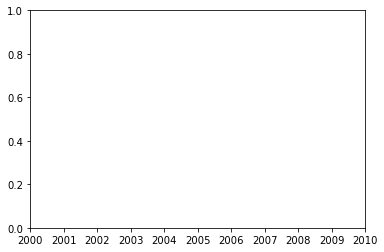

In [38]:
plt.plot(pd.date_range(start='2020-02-24',end='2020-06-10'),df['totale_casi'], marker='o')